### Use Geometric Center of Building to Cluster

## Import Processed Centroid Data

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt

In [2]:
rsd_ctr = np.asarray(list(np.genfromtxt('rsd_array_GeometricCentroids.csv', delimiter=',')) + 
            list(np.genfromtxt('Insubstantial_structures.csv', delimiter=',')))

assert len(rsd_ctr) == 2454 + 824

In [3]:
# ms = ms(bandwidth=bandwidth, bin_seeding=True)
ms = MeanShift(bandwidth = 700) # bandwidth is radius

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms.fit(rsd_ctr)
full_label = ms.labels_
num_clusters = len(np.unique(full_label)) 
# np.unique() -> how many unique elements there are
print('num of clusters:', len(np.unique(full_label)))
print('center location: ', ms.cluster_centers_)

num of clusters: 14
center location:  [[-11004062.65754823   2238323.62548457]
 [-11003912.51396905   2236649.64017783]
 [-11002950.8124401    2235826.73149878]
 [-11003026.36081907   2237009.61180503]
 [-11006288.05921857   2236659.68886757]
 [-11001605.10387104   2235079.16469558]
 [-11004567.02151017   2233870.68964815]
 [-11004248.63270488   2234789.43389594]
 [-11003281.84111395   2234761.57621973]
 [-11001775.01204004   2233572.56259776]
 [-11002740.87675745   2234076.06040728]
 [-11004631.35423337   2232482.07118217]
 [-11005896.89862244   2233303.18182702]
 [-11000557.68728013   2234671.4181624 ]]



|bandwidth|No. of clusters|
|--|--|
|10e2|567|
|400|34|
|500|21|
|700|14|
|1000|5|

PS only 700 is accurate, others are for reference

## Export number file

In [ ]:
# Save clustered and 2 error geometric objects dropped before
# Denote them with cluter 99
np.savetxt("Export/meanshift-total-list-plus2error.csv", 
           np.asarray(list(full_label[:2447]) + [-1, -1] + 
                      list(full_label[2447:])),
           delimiter = ",")

## Graphing

In [4]:
# Generate visually distance colors
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    return tuple([(int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16)) for i in colors])
# Reorganize the RGB data to hex
colors = get_spaced_colors(num_clusters + 1)

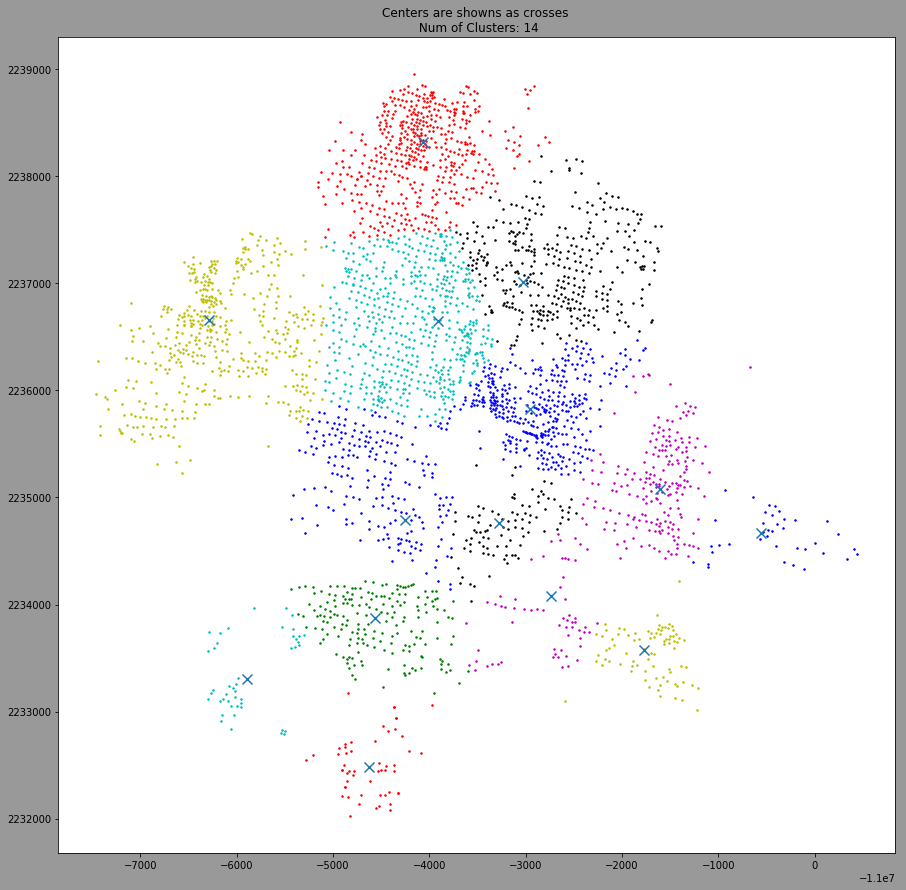

In [5]:
plt.figure(figsize = (15, 15), facecolor = '.6')
colors = ['r.', 'c.', 'b.', 'k.', 'y.', 'm.', 'g.', 'b.', 'k.', 'y.', 'm.']*2

for i in range(len(rsd_ctr)):
    plt.plot(rsd_ctr[i][0], rsd_ctr[i][1],  colors[full_label[i]], markersize = 3)

# paint center points
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1],
           marker = 'x', s = 100, linewidths = 0.3, zorder =10)

plt.title("Centers are showns as crosses \n Num of Clusters: %d" % len(np.unique(full_label)))
plt.show()

# Area Analysis

In [ ]:
from Area_Analysis import AreaAnalysis

In [ ]:
aa_mean_shift = AreaAnalysis(labels = full_label, 
                           ctr_points = rsd_ctr,
                           areas =  np.genfromtxt('Area_3278.csv', delimiter=','))

In [ ]:
aa_mean_shift.Results

## Linear Regression between total area and built area

In [ ]:
from scipy import stats
from math import log
total_area_log = np.asarray([log(i) for i in aa_mean_shift.Results.total_area])
built_area_log = np.asarray([log(i) for i in aa_mean_shift.Results.built_area])

lin_reg = stats.linregress(x = total_area_log, y = built_area_log)
best_fit_line = lin_reg.slope * np.asarray([i for i in range(30)]) + lin_reg.intercept

figure10 = plt.figure(facecolor = '.6', figsize = (10,10))
# plt.(Results.total_area, Results.built_area, 'o')
plt.scatter(x = total_area_log, y = built_area_log)
plt.plot(best_fit_line)
plt.ylim((8, 16)); plt.xlim((10, 20))
plt.xlabel("logged total area of each cluter")
plt.ylabel("logged built area of each cluter")
plt.title('Graph of built area against total area (both logged)')
plt.show()
print('slopt of the line is: ',lin_reg.slope)
print('y-intercept of the line is: ',lin_reg.intercept)

### Histogram for the allocation of areas in a cluster

In [ ]:

i = 5 # change i to desired cluster number to view 
plt.figure(facecolor = '.6')
hist_fig = dfArea[dfArea.cluster == i].area.hist(bins = 30).get_figure()
plt.title('asdf')
# dfArea.area.dropna().plot(kind='kde',xlim=(0,5*10e3), style='r--')